In [54]:
#Step 1: Import the necessary libraries/dependencies
import pandas as pd
import numpy as np
from scipy.stats import pearsonr # for correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [55]:
#Step 2: Load Data

#Path
whr_path = "/Users/nels.jacobson2/Desktop/Analytics_Class_Folder/Group 7 Project 1/World Happiness Report.csv"

#Read in data and create DataFrame
whr_df = pd.read_csv(whr_path)
whr_df.columns


Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [56]:
#Step 3: Data Cleaning
# Extract the desired columns from whr_df
columns_to_keep = ['Country Name', 'Year', 'Life Ladder', 'Positive Affect', 'Negative Affect']
affect_df = whr_df[columns_to_keep].copy()

# Rename 'Life Ladder' to 'Happiness Score'
affect_df.rename(columns={'Life Ladder': 'Happiness Score'}, inplace=True)

# Create a new column 'Affect Difference' as the difference between 'Positive Affect' and 'Negative Affect'
affect_df['Affect Difference'] = affect_df['Positive Affect'] - affect_df['Negative Affect']
affect_df

# Group data by country
grouped_affect_df = affect_df.groupby('Country Name')

# Filter out countries with less than 5 years of data
affect_df_filtered = grouped_affect_df.filter(lambda x: len(x) >= 5)

affect_df_filtered

affect_avg_df = affect_df_filtered.groupby('Country Name').mean().reset_index()
affect_avg_df

,Country Name,Year,Happiness Score,Positive Affect,Negative Affect,Affect Difference
0,Afghanistan,2014.642857,3.346632,0.433324,0.364459,0.068865
1,Albania,2014.933333,5.048016,0.557358,0.293262,0.264096
2,Algeria,2015.800000,5.377251,0.535673,0.267095,0.268578
3,Argentina,2014.000000,6.283633,0.739047,0.287630,0.451416
4,Armenia,2013.625000,4.617078,0.497932,0.444081,0.053850
...,...,...,...,...,...,...
145,Venezuela,2013.882353,5.961915,0.775159,0.269507,0.505652
146,Vietnam,2014.000000,5.385371,0.617444,0.209997,0.407176
147,Yemen,2013.416667,3.912124,0.458260,0.293548,0.164712
148,Zambia,2013.733333,4.453841,0.678728,0.297978,0.380750


In [57]:
#Data Analysis

# Aggregate the data by country and year
affect_agg = affect_avg_df.groupby(['Country Name', 'Year']).mean().reset_index()

# Group by country and calculate average happiness score over the period
country_scores = affect_avg_df.groupby('Country Name')['Happiness Score'].mean()

# Get top 10 and bottom 10 countries based on average happiness score
top_countries = country_scores.nlargest(10).index.tolist()
bottom_countries = country_scores.nsmallest(10).index.tolist()

# Create a new dataframe with only the top and bottom countries
affect_df_subset = affect_avg_df.loc[affect_avg_df['Country Name'].isin(top_countries + bottom_countries)]

affect_df_subset

,Country Name,Year,Happiness Score,Positive Affect,Negative Affect,Affect Difference
0,Afghanistan,2014.642857,3.346632,0.433324,0.364459,0.068865
15,Botswana,2013.923077,3.953261,0.653616,0.234764,0.418852
19,Burundi,2012.000000,3.548124,0.570199,0.244124,0.326075
22,Canada,2013.941176,7.323657,0.781414,0.254535,0.526880
23,Central African Republic,2012.200000,3.514954,0.539942,0.391497,0.148445
28,Comoros,2014.428571,3.886998,0.640660,0.250805,0.389855
35,Denmark,2013.941176,7.673428,0.783842,0.198059,0.585783
42,Finland,2014.800000,7.619146,0.738976,0.185973,0.553003
55,Iceland,2016.300000,7.458607,0.806559,0.163893,0.642667
61,Israel,2014.000000,7.265653,0.613808,0.296254,0.317554


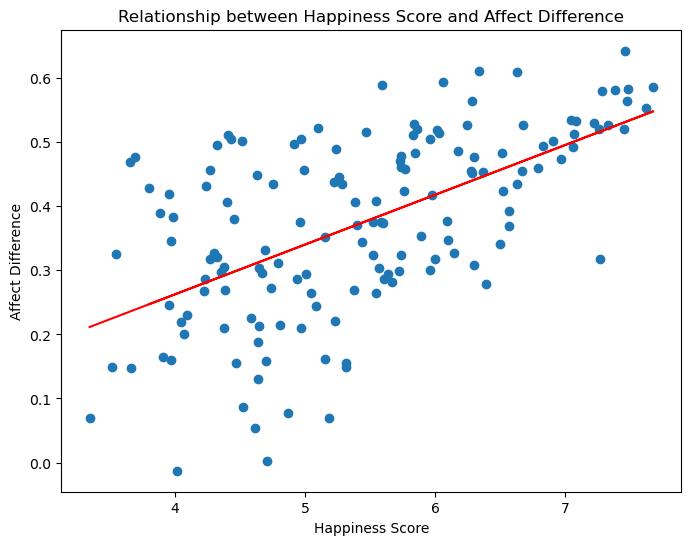

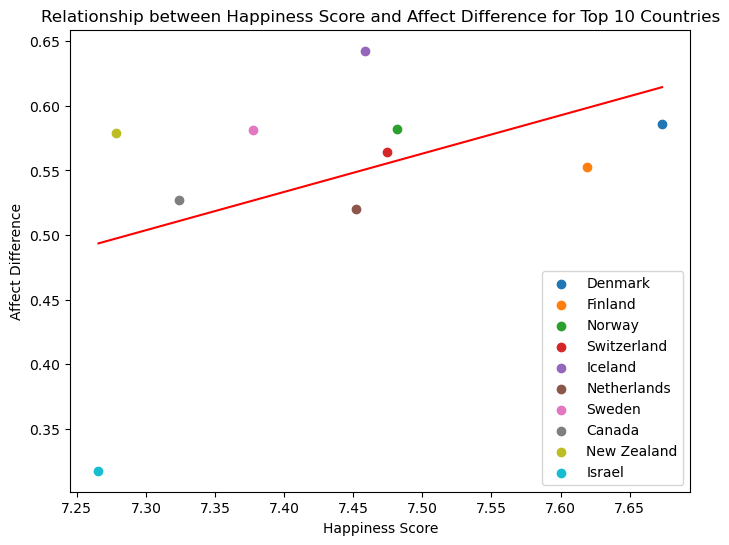

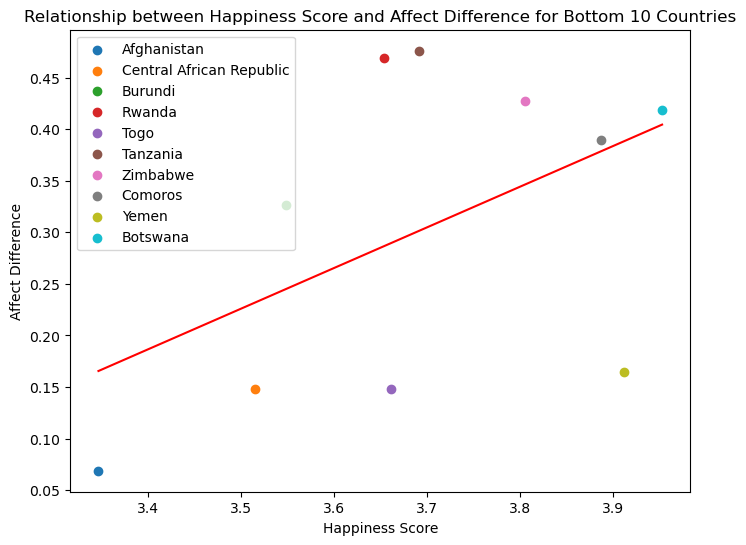

In [65]:
# Create a scatter plot to show the relationship between the Happiness Score and Affect Difference for all countries
plt.figure(figsize=(8, 6))
plt.scatter(affect_agg['Happiness Score'], affect_agg['Affect Difference'])
plt.xlabel('Happiness Score')
plt.ylabel('Affect Difference')
plt.title('Relationship between Happiness Score and Affect Difference')

# Perform linear regression on all data points
X = np.array(affect_agg['Happiness Score']).reshape((-1, 1))
y = np.array(affect_agg['Affect Difference'])
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')

plt.show()


# Create a scatter plot to show the relationship between the Happiness Score and Affect Difference for top 10 countries
plt.figure(figsize=(8, 6))
for country in top_countries:
    country_data = affect_agg[affect_agg['Country Name'] == country]
    plt.scatter(country_data['Happiness Score'], country_data['Affect Difference'], label=country)

plt.xlabel('Happiness Score')
plt.ylabel('Affect Difference')
plt.title('Relationship between Happiness Score and Affect Difference for Top 10 Countries')
plt.legend()

# Perform linear regression for top 10 countries
X_top = np.array([affect_agg[affect_agg['Country Name'] == c]['Happiness Score'].mean() for c in top_countries]).reshape((-1, 1))
y_top = np.array([affect_agg[affect_agg['Country Name'] == c]['Affect Difference'].mean() for c in top_countries])
model_top = LinearRegression().fit(X_top, y_top)
y_top_pred = model_top.predict(X_top)
plt.plot(X_top, y_top_pred, color='red')

plt.show()


# Create a scatter plot to show the relationship between the Happiness Score and Affect Difference for bottom 10 countries
plt.figure(figsize=(8, 6))
for country in bottom_countries:
    country_data = affect_agg[affect_agg['Country Name'] == country]
    plt.scatter(country_data['Happiness Score'], country_data['Affect Difference'], label=country)

plt.xlabel('Happiness Score')
plt.ylabel('Affect Difference')
plt.title('Relationship between Happiness Score and Affect Difference for Bottom 10 Countries')
plt.legend()

# Perform linear regression for bottom 10 countries
X_bottom = np.array([affect_agg[affect_agg['Country Name'] == c]['Happiness Score'].mean() for c in bottom_countries]).reshape((-1, 1))
y_bottom = np.array([affect_agg[affect_agg['Country Name'] == c]['Affect Difference'].mean() for c in bottom_countries])
model_bottom = LinearRegression().fit(X_bottom, y_bottom)
y_bottom_pred = model_bottom.predict(X_bottom)
plt.plot(X_bottom, y_bottom_pred, color='red')

plt.show()


In [64]:
corr_coeff, p_value = pearsonr(affect_agg['Happiness Score'], affect_agg['Affect Difference'])

print(f"Pearson correlation coefficient: {corr_coeff:.2f}")
print(f"p-value: {p_value:.2f}")


Pearson correlation coefficient: 0.58
p-value: 0.00
